### Q. 로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망 모델 개발
- 데이터 소스 : from keras.datasets import reuters
- 데이터 및 레이블 벡터 변환 : 주어진 사용자 함수 참조
- 모델 구성 : 2개 은닉층(64개 유닛), 1개 출력층
- 검증 : 훈련 데이터에서 1000개 분리하여 검증 데이터로 사용
- 시각화 : 정확도와 손실율 곡선을 비교 시사점 도출

In [7]:
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 10000

# 특성과 타깃 데이터를 로드합니다.
data = reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data

# 특성 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 타깃 벡터를 원-핫 인코딩하여 타깃 행렬을 만듭니다.
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

# 신경망 모델을 만듭니다.
network = models.Sequential()
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

network.add(layers.Dense(units=100,
#                          kernel_regularizer=regularizers.l2(0.01),
                         activation="relu",
                         input_shape=(number_of_features,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=100,
#                          kernel_regularizer=regularizers.l2(0.01),
                         activation="relu"))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=46, activation="softmax"))

# 신경망의 모델 설정을 완료합니다.
# 다중 분류에 맞은 손실 함수인 범주형 크로스엔트로피를 사용하기 위해
# categorical_ crossentropy로 설정
network.compile(loss="categorical_crossentropy", 
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 조기 종료
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="bestm_model.h5",
                             monitor="val_loss",
                             save_best_only=True)]

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃
                      epochs=30, 
                      verbose=1, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

# 훈련 손실과 테스트 손실의 기록을 저장합니다.
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(training_accuracy) + 1)

print('\n')
print('모델 성능 :')
print(network.evaluate(features_test, target_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/30
8982/8982 [==============================] - 2s 274us/step - loss: 2.0493 - accuracy: 0.5208 - val_loss: 1.4428 - val_accuracy: 0.6736
Epoch 2/30
8982/8982 [==============================] - 2s 256us/step - loss: 1.4119 - accuracy: 0.6750 - val_loss: 1.2591 - val_accuracy: 0.7155
Epoch 3/30
8982/8982 [==============================] - 2s 259us/step - loss: 1.1964 - accuracy: 0.7242 - val_loss: 1.1582 - val_accuracy: 0.7471
Epoch 4/30
8982/8982 [==============================] - 2s 255us/step - loss: 1.0670 - accuracy: 0.7572 - val_loss: 1.1064 - val_accuracy: 0.7609
Epoch 5/30
8982/8982 [==============================] - 2s 255us/step - loss: 0.9575 - accuracy: 0.7769 - val_loss: 1.0666 - val_accuracy: 0.7725
Epoch 6/30
8982/8982 [==============================] - 3s 310us/step - loss: 0.8876 - accuracy: 0.7961 - val_loss: 1.0694 - val_accuracy: 0.7796
Epoch 7/30
8982/8982 [==============================] - 4s 419us/step - loss

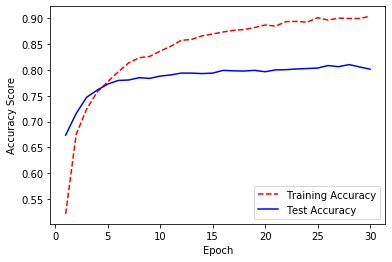

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# 시각화
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()
plt.close()